In [113]:
# Kennedi Todd
# August 6, 2024
# Chapter 10: Logisitic Regression
# Predict wether a kickstarter campaign will reach its target funding

# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# read data
df = pd.read_csv('18k_Projects.csv')
df.head()

/var/folders/dv/p3k0h46n41g3h9sq2z6v72100000gn/T/ipykernel_72816/1543146703.py:16: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('18k_Projects.csv')


,Id,Name,Url,State,Currency,Top Category,Category,Creator,Location,Updates,...,End Timestamp (UTC),Creator Bio,Creator Website,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,USD,Art,Art,Dodie Egolf,Puyallup,0,...,2014/01/14 01:53:49.000,https://www.kickstarter.com/profile/1370199487,NaN,1,0.0,0.0,2,297,153.0,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,USD,Film & Video,Short Film,James Jacobs,Boston,0,...,2014/01/17 02:30:01.000,https://www.kickstarter.com/profile/737783165,NaN,1,4.0,0.0,0,276,98.0,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,USD,Fashion,Fashion,Uchu Bijin,New York,1,...,2014/01/14 01:29:42.000,https://www.kickstarter.com/profile/858150887,http://uchubijin.com,2,2.0,0.0,12,1049,66.0,2
3,514687871,"Poetically Speaking: Stories of Love, Triumph ...",https://www.kickstarter.com/projects/tylicee/p...,failed,USD,Publishing,Poetry,Tylicee Mysreign,Detroit,0,...,2014/02/13 01:12:28.000,https://www.kickstarter.com/profile/1079088465,http://www.linkedin.com/pub/mys-reign/1a/469/4a8,1,2.0,0.0,0,309,169.0,0
4,683545993,Stranger Travels: Teachings from the Heart of ...,https://www.kickstarter.com/projects/197270300...,failed,USD,Publishing,Nonfiction,Ian Driscoll,Pucallpa,0,...,2014/01/14 01:17:46.000,https://www.kickstarter.com/profile/1972703001,http://strangertravels.wordpress.com,1,0.0,0.0,6,1636,216.0,0


In [114]:
df.describe(include = 'all')

,Id,Name,Url,State,Currency,Top Category,Category,Creator,Location,Updates,...,End Timestamp (UTC),Creator Bio,Creator Website,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
count,1.814200e+04,18142,18142,18142,18142,18142,18142,18142,18142,18142.000000,...,18142,18142,11475,18142.000000,13898.000000,18041.000000,18142.000000,18142.000000,18041.000000,18142.000000
unique,NaN,18065,18142,2,6,15,145,17427,3357,NaN,...,16608,17505,11165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,New edition of Robert Burns in Contemporary Am...,https://www.kickstarter.com/projects/jasonloh/...,failed,USD,Film & Video,Product Design,Benjamin Hennessey,Los Angeles,NaN,...,2014/06/01 03:59:00.000,https://www.kickstarter.com/profile/2053011023,http://kickingitforward.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,1,9104,14331,3479,1064,13,881,NaN,...,19,13,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.073471e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.368647,...,NaN,NaN,NaN,1.520119,5.149950,0.226207,6.898302,668.056278,130.330359,0.679032
std,6.181166e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.547975,...,NaN,NaN,NaN,2.540474,20.351979,0.877530,10.272907,582.136947,96.989659,2.045969
min,1.061440e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,3.000000,8.000000,0.000000
25%,5.385158e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,276.000000,69.000000,0.000000
50%,1.078580e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,1.000000,1.000000,0.000000,3.000000,490.000000,105.000000,0.000000
75%,1.606254e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,1.000000,4.000000,0.000000,10.000000,871.750000,163.000000,0.000000


In [115]:
# remove variables
df.drop(['Id','Name','Url','Location','Pledged','Creator','Category','Updates','Start',
        'Latitude','Longitude','Start Timestamp (UTC)','End Timestamp (UTC)',
        'Creator Bio','Creator Website','End'],
        axis = 1,
        inplace = True)
df.head()

,State,Currency,Top Category,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,failed,USD,Art,0,9,20000,2,30,Yes,272.0,70,Yes,1,0.0,0.0,2,297,153.0,0
1,failed,USD,Film & Video,0,8,3000,5,33,Yes,573.0,57,Yes,1,4.0,0.0,0,276,98.0,0
2,failed,USD,Fashion,2,17,5000,62,30,No,NaN,158,No,2,2.0,0.0,12,1049,66.0,2
3,failed,USD,Publishing,0,4,5000,5,60,Yes,1285.0,2,Yes,1,2.0,0.0,0,309,169.0,0
4,failed,USD,Publishing,0,12,12000,16,30,Yes,969.0,411,Yes,1,0.0,0.0,6,1636,216.0,0


In [116]:
df.shape

(18142, 19)

In [117]:
# one-hot encoding
df = pd.get_dummies(df,
                   columns = ['State','Currency','Top Category','Facebook Connected',
                              'Has Video'],
                   drop_first = True)

In [118]:
df.shape

(18142, 36)

In [119]:
# inspect missing values
df.isnull().sum()

Comments                             0
Rewards                              0
Goal                                 0
Backers                              0
Duration in Days                     0
Facebook Friends                  5852
Facebook Shares                      0
Creator - # Projects Created         0
Creator - # Projects Backed       4244
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               0
State_successful                     0
Currency_CAD                         0
Currency_EUR                         0
Currency_GBP                         0
Currency_NZD                         0
Currency_USD                         0
Top Category_Comics                  0
Top Category_Crafts                  0
Top Category_Dance                   0
Top Category_Design                  0
Top Category_Fashion                 0
Top Category_Film & Video

In [120]:
df.describe()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
count,18142.000000,18142.000000,1.814200e+04,18142.000000,18142.000000,12290.000000,18142.000000,18142.000000,13898.000000,18041.000000,18142.000000,18142.000000,18041.000000,18142.000000
mean,34.243027,10.042002,2.653121e+04,138.070279,31.398468,694.233686,396.729137,1.520119,5.149950,0.226207,6.898302,668.056278,130.330359,0.679032
std,539.161283,5.889806,7.583874e+05,633.787780,10.058827,783.802343,2544.711314,2.540474,20.351979,0.877530,10.272907,582.136947,96.989659,2.045969
min,0.000000,2.000000,1.000000e+02,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,8.000000,0.000000
25%,0.000000,6.000000,2.000000e+03,7.000000,29.000000,216.250000,21.000000,1.000000,0.000000,0.000000,0.000000,276.000000,69.000000,0.000000
50%,0.000000,9.000000,5.000000e+03,29.000000,30.000000,453.000000,104.000000,1.000000,1.000000,0.000000,3.000000,490.000000,105.000000,0.000000
75%,3.000000,12.000000,1.500000e+04,89.000000,32.000000,860.000000,322.000000,1.000000,4.000000,0.000000,10.000000,871.750000,163.000000,0.000000
max,30341.000000,131.000000,1.000000e+08,35383.000000,60.000000,4885.000000,260505.000000,111.000000,1205.000000,24.000000,166.000000,5152.000000,1888.000000,47.000000


In [121]:
# 'Facebook Friends' correlation with dependent variable
print(df['State_successful'].corr(df['Facebook Friends']))

0.15954024784972815


<Axes: xlabel='Facebook Friends', ylabel='Density'>

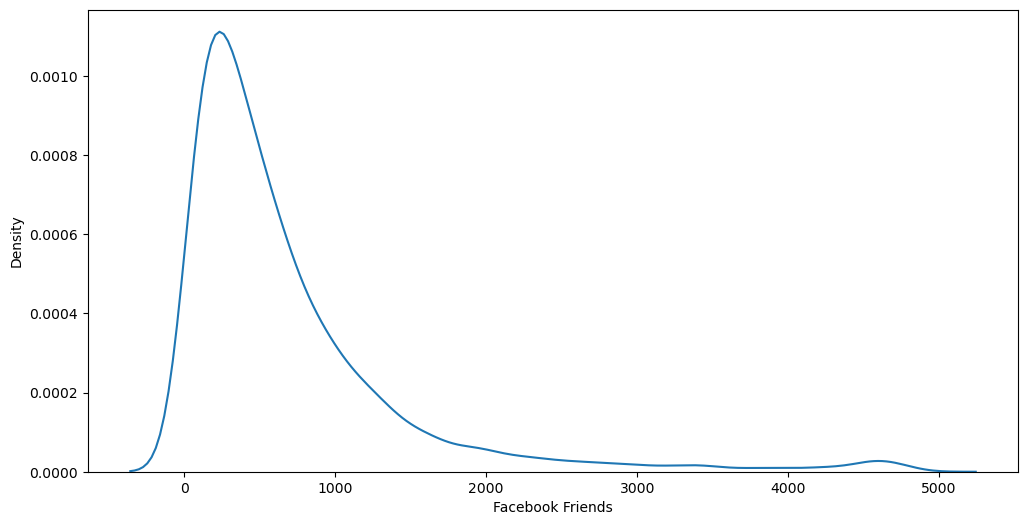

In [122]:
# distribution plot for 'Facebook Friends'
plt.figure(figsize = (12,6))
sns.kdeplot(df['Facebook Friends'])

In [123]:
# 'Creator - # Projects Backed' correlation with dependent variable
print(df['State_successful'].corr(df['Creator - # Projects Backed']))

0.10624973985586753


<Axes: xlabel='Creator - # Projects Backed', ylabel='Density'>

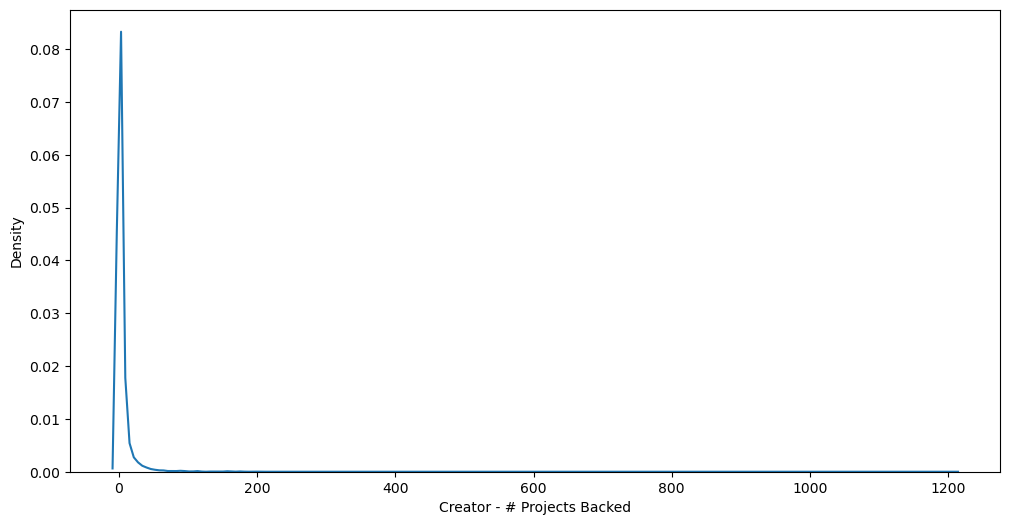

In [124]:
# distribution plot for 'Creator - # Projects Backed'
plt.figure(figsize = (12,6))
sns.kdeplot(df['Creator - # Projects Backed'])

In [125]:
# '# Videos' correlation with dependent variable
print(df['State_successful'].corr(df['# Videos']))

0.05657919078430421


In [126]:
# '# Words (Risks and Challenges)' correlation with dependent variable
print(df['State_successful'].corr(df['# Words (Risks and Challenges)']))

0.007544860569767824


In [127]:
# 'Creator - # Projects Backed' has many missing values but significant corr with State_successsful
# 'Creator - # Projects Backed' has low range, standard deviation
# replace missing values with the mean
df.fillna({'Creator - # Projects Backed': df['Creator - # Projects Backed'].mean()}, inplace = True)

# 'Facebook Friends' has many missing values & significant corr with 'State_successsful'
# 'Facebook Friends' has high standard deviation & high variance in mean/median/mode
# NOT recommended to replace missing values with the mean due to high variance
# course of action: remove rows with missing values

# low number of missing values for # Videos & low corr with State_successful
# remove feature or remove rows with missing values

# low number of missing values for # Words (Risks and Challenges) & low corr with State_successful
# remove feature or remove rows with missing values

# drop rows with missing values for Facebook Friends, # Videos, and # Words (Risks and Challenges)
df.dropna(axis = 0,
         how = 'any',
         subset = None,
         inplace = True)

# dimensions
df.shape

(12215, 36)

In [128]:
df.head()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
0,0,9,20000,2,30,272.0,70,1,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
1,0,8,3000,5,33,573.0,57,1,4.0,0.0,...,False,False,False,False,False,False,False,False,True,True
3,0,4,5000,5,60,1285.0,2,1,2.0,0.0,...,False,False,False,False,False,True,False,False,True,True
4,0,12,12000,16,30,969.0,411,1,0.0,0.0,...,False,False,False,False,False,True,False,False,True,True
5,0,13,90000,16,40,1566.0,142,2,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False


In [129]:
# set X and y variables
X = df.drop('State_successful', axis = 1)
y = df['State_successful']

# shuffle and split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 10, 
                                                    shuffle = True)

# set algorithm
model = LogisticRegression()

# fit data
model.fit(X_train, y_train)

# evaluate
model_predict = model.predict(X_test)
print(confusion_matrix(y_test, model_predict))

[[1658  171]
 [ 227 1609]]


/Users/kenneditodd/miniconda3/envs/jupyter/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

       False       0.88      0.91      0.89      1829
        True       0.90      0.88      0.89      1836

    accuracy                           0.89      3665
   macro avg       0.89      0.89      0.89      3665
weighted avg       0.89      0.89      0.89      3665



In [131]:
# predict
#new_project = []
#new_pred = model.predict([new_project])
#new_pred